# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [9]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
#Initialize a new Browser instance using Chrome as the browser.
browser = Browser('chrome') 



### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [12]:
# Set up Splinter
executable_path = {'executable_path': 'path/to/chromedriver'}  # Provide the correct path to your ChromeDriver
browser = Browser('chrome')

# URL to scrape
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

# Get the HTML content of the page
html_content = browser.html

# Create BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table
table = soup.find('table')

# Convert the table into a pandas DataFrame
df = pd.read_html(str(table))[0]

# Print the DataFrame
print(df)

# Close the browser
browser.quit()


C:\Users\HP\AppData\Local\Temp\ipykernel_27912\2364644587.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [13]:
# Set up Splinter
browser = Browser('chrome')

# URL to scrape
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

# Get the HTML content of the page
html_content = browser.html

# Create BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table
table = soup.find_all('table')

# Convert the table into a pandas DataFrame
df = pd.read_html(str(table))[0]

# Print the DataFrame
print(df)

# Close the browser
browser.quit()


C:\Users\HP\AppData\Local\Temp\ipykernel_27912\141643330.py:23: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


In [14]:
# Extract all rows of data


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [16]:
# Create an empty list to store rows
rows_list = []

# Loop through the DataFrame to create a list of rows
for index, row in df.iterrows():
    rows_list.append(row.tolist())

# Print the list of rows
print(rows_list)

# Close the browser
browser.quit()


[[2, '2012-08-16', 10, 155, 6, -75.0, 739.0], [13, '2012-08-17', 11, 156, 6, -76.0, 740.0], [24, '2012-08-18', 12, 156, 6, -76.0, 741.0], [35, '2012-08-19', 13, 157, 6, -74.0, 732.0], [46, '2012-08-20', 14, 157, 6, -74.0, 740.0], [57, '2012-08-21', 15, 158, 6, -78.0, 740.0], [68, '2012-08-22', 16, 158, 6, -77.0, 740.0], [79, '2012-08-23', 17, 159, 6, -76.0, 742.0], [112, '2012-08-27', 21, 161, 6, -74.0, 741.0], [114, '2012-08-28', 22, 162, 6, -74.0, 742.0], [123, '2012-08-29', 23, 162, 6, -75.0, 741.0], [134, '2012-08-30', 24, 163, 6, -75.0, 742.0], [145, '2012-08-31', 25, 163, 6, -75.0, 743.0], [156, '2012-09-01', 26, 164, 6, -76.0, 745.0], [163, '2012-09-02', 27, 164, 6, -75.0, 743.0], [170, '2012-09-03', 28, 165, 6, -75.0, 745.0], [171, '2012-09-04', 29, 166, 6, -75.0, 747.0], [172, '2012-09-05', 30, 166, 6, -74.0, 747.0], [173, '2012-09-06', 31, 167, 6, -74.0, 745.0], [175, '2012-09-08', 33, 168, 6, -73.0, 748.0], [176, '2012-09-10', 34, 168, 6, -73.0, 748.0], [177, '2012-09-11', 3

In [20]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Find the table
table = soup.find_all('table')

# Convert the table into a pandas DataFrame
df = pd.read_html(str(table))[0]

# Confirm DataFrame was created successfully
# Print the DataFrame
print(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_27912\4094293355.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


In [18]:
# Confirm DataFrame was created successfully
# Print the DataFrame
print(df)

# Close the browser
browser.quit()

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [24]:
# Examine data type of each column
# Display the data types of each column
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [63]:
# Change data types for data analysis

# Sample DataFrame
data = {
    'Date': ['2024-01-01', '2024-01-02'],
    'Temperature': ['20.5', '21.3'],
    'City': ['Columbus', 'Cincinnati']
}
df = pd.DataFrame(data)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Temperature' to float
df['Temperature'] = df['Temperature'].astype(float)

# Convert 'City' to categorical
df['City'] = df['City'].astype('category')

# Display the DataFrame and its dtypes
print("DataFrame after type conversion:")
print(df)
print("\nData types of each column:")
print(df.dtypes)


DataFrame after type conversion:
        Date  Temperature        City
0 2024-01-01         20.5    Columbus
1 2024-01-02         21.3  Cincinnati

Data types of each column:
Date           datetime64[ns]
Temperature           float64
City                 category
dtype: object


In [64]:
# Confirm type changes were successful by examining data types again

# Examine data type of each column
# Display the data types of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Date           datetime64[ns]
Temperature           float64
City                 category
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [71]:
# 1. # 1. How many months are there on Mars?
# 1 Number of months on Mars

num_months = len(df)
print(f"Number of months: {num_months}")

Number of months: 2


In [48]:
# 2. How many Martian days' worth of data are there?
# 2. Number of Martian days
num_martian_days = len(df)
print(f"Number of Martian days in the dataset: {num_martian_days}")

Number of Martian days in the dataset: 1867


In [ ]:
# 3. What is the average low temperature by month?
avenum_months = len(df)
print(f"Number of months: {num_months}")

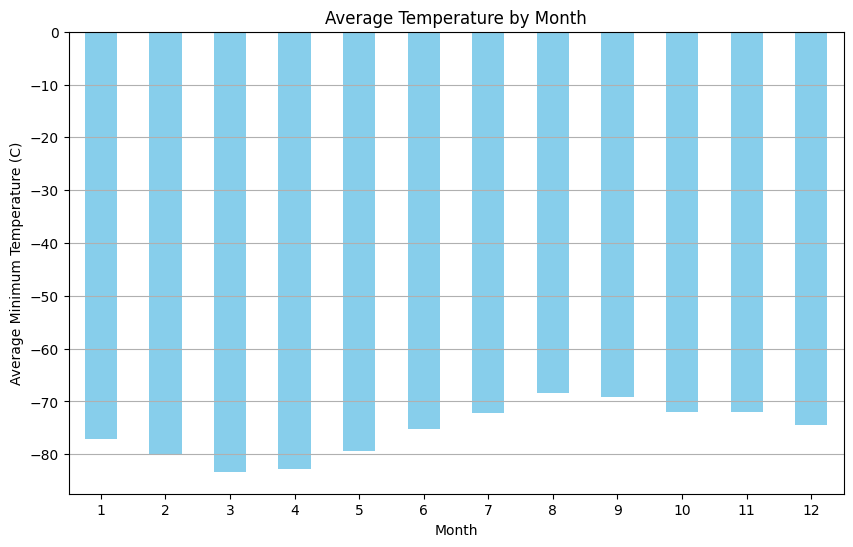

In [81]:
# Plot the average temperature by month

# Group by 'month' and calculate the mean of 'min_temp'
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (C)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the plot
plt.show()


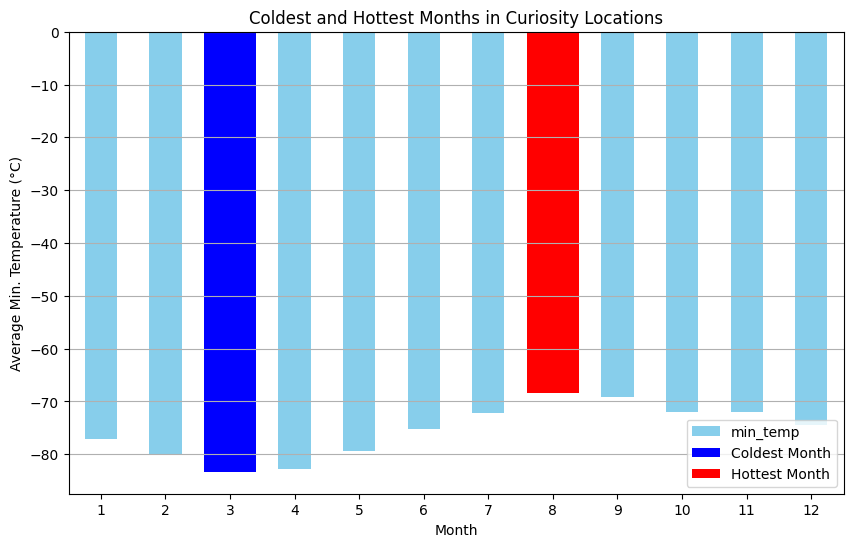

Coldest month: 3 with average temperature -83.31°C
Hottest month: 8 with average temperature -68.38°C


In [84]:
# Identify the coldest and hottest months in Curiosity's location

# Group by 'month' and calculate the mean of 'min_temp'
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = avg_min_temp_by_month.idxmin()
hottest_month = avg_min_temp_by_month.idxmax()

# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Coldest and Hottest Months in Curiosity Locations')
plt.xlabel('Month')
plt.ylabel('Average Min. Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Highlight the coldest and hottest months
plt.bar(coldest_month - 1, avg_min_temp_by_month[coldest_month], color='blue', label='Coldest Month')
plt.bar(hottest_month - 1, avg_min_temp_by_month[hottest_month], color='red', label='Hottest Month')

plt.legend()
plt.show()

# Print the coldest and hottest months
print(f"Coldest month: {coldest_month} with average temperature {avg_min_temp_by_month[coldest_month]:.2f}°C")
print(f"Hottest month: {hottest_month} with average temperature {avg_min_temp_by_month[hottest_month]:.2f}°C")



In [85]:
# 4. Average pressure by Martian month

# Group by 'month' and calculate the mean of 'pressure'
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the average pressure by month
print("Average Atmospheric Pressure by Month on Mars:")
print(avg_pressure_by_month)


Average Atmospheric Pressure by Month on Mars:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


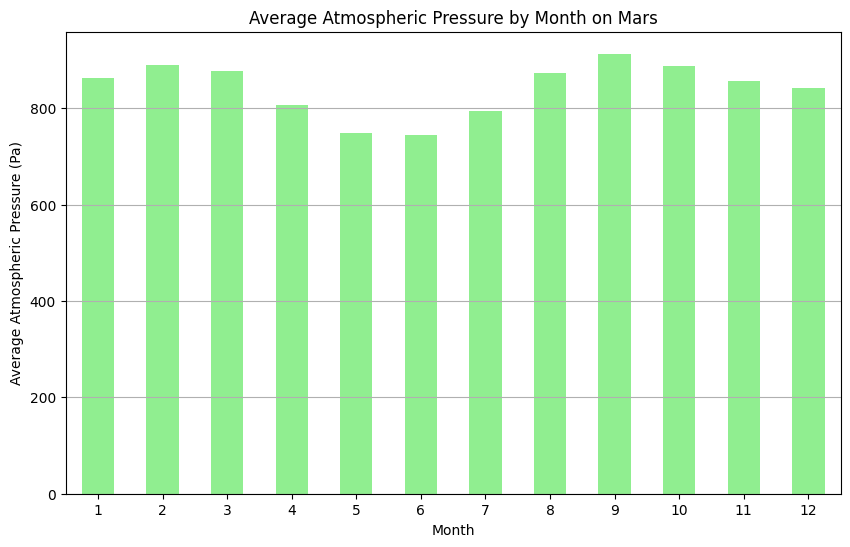

Average Atmospheric Pressure by Month on Mars:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [86]:
# Plot the average pressure by month

# Group by 'month' and calculate the mean of 'pressure'
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='lightgreen')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

# Print the average pressure by month
print("Average Atmospheric Pressure by Month on Mars:")
print(avg_pressure_by_month)


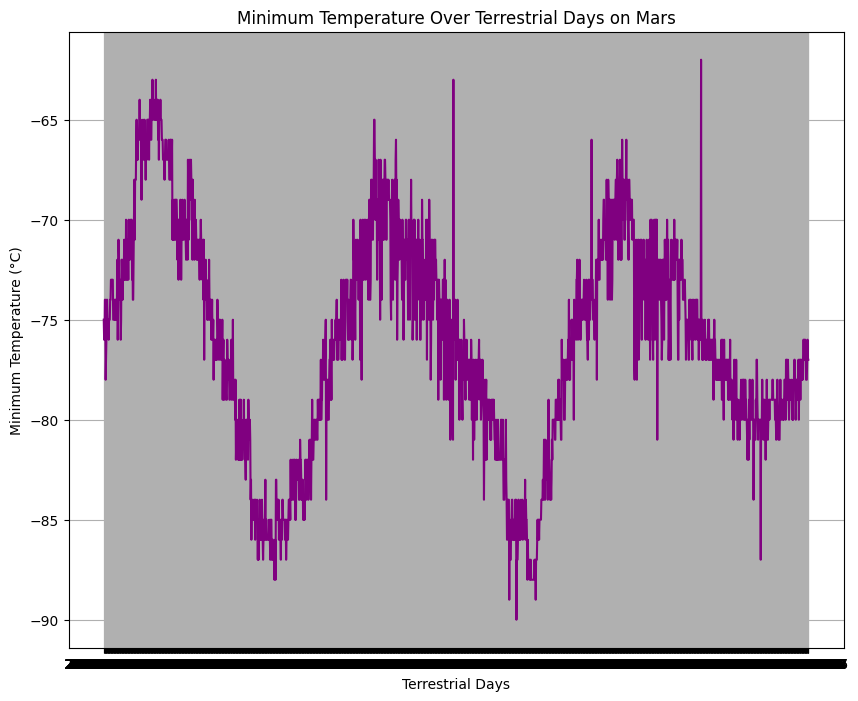

In [94]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# 5. Terrestrial days in a Martian year

# Assuming the DataFrame 'df' has been loaded with the data

# Plotting the data
plt.figure(figsize=(10, 8))
plt.plot(df['terrestrial_date'], df['min_temp'], color='purple')

# Adding labels and title
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature Over Terrestrial Days on Mars')

# Display the plot
plt.xticks(rotation=0)
plt.grid(True)
 #plt.tight_layout()
plt.show()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [98]:
# Write the data to a CSV

# Writing the DataFrame to a CSV file
df.to_csv('mars_temperature_data.csv', index=False)

print ()

In [21]:
browser.quit()